<a href="https://colab.research.google.com/github/GaryPython/-Machine-Learning/blob/main/%E9%9D%9E%E7%9B%A3%E7%9D%A3%E5%AD%B8%E7%BF%92/17_t_Distributed_Stochastic_Neighbor_Embedding%2Ct_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#t-Distributed Stochastic Neighbor Embedding,t-SNE


*   流行學習（Manifold learning）
*   降維
>空間視覺化,降至二維或三維
*  降維方式比較
>PCA
>>雖可呈現某種程度的集中，但不同數值參雜其中

  >LLE
  >> 雖適用於「非線性結構」，但不是「瑞士卷」這類型具有集中性的資料， 無法掌握其資料結構
>

 >t-SNE
>>二維空間中每個數值的資料很集中，能順利分類資料結構



In [ ]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits#圖片


data = load_digits()
n_components = 2 # 降為後定為度為2
model = TSNE(n_components=n_components)
print(model.fit_transform(data.data))

[[ -4.415817  -63.974445 ]
 [ 35.929676   12.775582 ]
 [ 22.441792   -8.3593445]
 ...
 [ 17.209513    2.1944728]
 [-11.780601   -0.4729673]
 [ 11.617486   -1.2409478]]


In [ ]:
len(data.data)

1797

In [ ]:
data.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
len(data.images)

1797

In [ ]:
data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
data.images[0] == data.data[0].reshape(8,8)

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]])

In [ ]:
data

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

##降維方式比較

In [ ]:
from sklearn.datasets import load_digits#圖片
data = load_digits()

###PCA

In [ ]:
from sklearn.decomposition import PCA
n_components = 2 
model = PCA(n_components=n_components)
model = model.fit(data.data)
print(len(model.transform(data.data)))
x = model.transform(data.data)
print(x)#轉換後的資料

1797
[[ -1.25946662  21.27488383]
 [  7.95761126 -20.76869873]
 [  6.99192316  -9.95598683]
 ...
 [ 10.80128351  -6.96025171]
 [ -4.87209932  12.42395198]
 [ -0.34438965   6.36554914]]


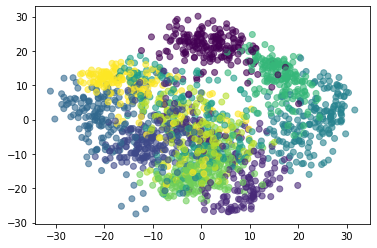

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1], alpha=0.6 ,c = data.target)

###LLE

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding


n_neighbors = 12 # 鄰近點數 
n_components = 2 # 降維後的維度
model = LocallyLinearEmbedding(n_neighbors=n_neighbors,
n_components=n_components)
model.fit(data.data)
x = model.transform(data.data)
print(len(x))
print(x) # 轉換後的資料


1797
[[ 5.98145768e-02  2.94423276e-02]
 [-1.12149317e-02 -1.06614858e-02]
 [-5.56060435e-03 -5.03693088e-03]
 ...
 [-9.94832905e-03 -5.35754494e-03]
 [-4.71436164e-03  5.90005212e-05]
 [-5.72631972e-03 -2.76022663e-03]]


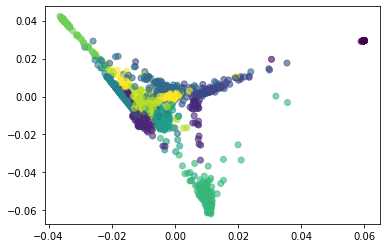

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1], alpha=0.6 ,c = data.target)

###t-SNE

In [ ]:
from sklearn.manifold import TSNE
n_components = 2 # 降為後定為度為2
model = TSNE(n_components=n_components)
x = model.fit_transform(data.data)
print(x)

[[ 68.84812     -3.8514845 ]
 [-23.582037    -3.478472  ]
 [ -7.008374    20.446236  ]
 ...
 [ -5.772585     8.555552  ]
 [ 25.565107     1.9254334 ]
 [  0.29128364  11.267572  ]]


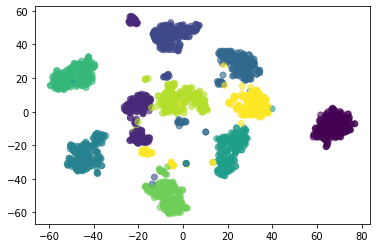

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1], alpha=0.6 ,c = data.target)


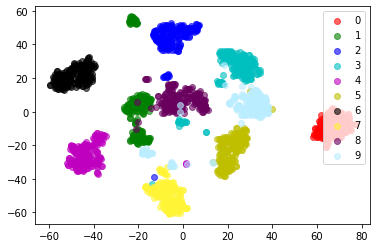

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x[data.target == 0,0], x[data.target ==0,1], alpha=0.6 ,c = 'r',label ='0')
plt.scatter(x[data.target == 1,0], x[data.target ==1,1], alpha=0.6 ,c = 'g',label ='1')
plt.scatter(x[data.target == 2,0], x[data.target ==2,1], alpha=0.6 ,c = 'b',label ='2')
plt.scatter(x[data.target == 3,0], x[data.target ==3,1], alpha=0.6 ,c = 'c',label ='3')
plt.scatter(x[data.target == 4,0], x[data.target ==4,1], alpha=0.6 ,c = 'm',label ='4')
plt.scatter(x[data.target == 5,0], x[data.target ==5,1], alpha=0.6 ,c = 'y',label ='5')
plt.scatter(x[data.target == 6,0], x[data.target ==6,1], alpha=0.6 ,c = 'k',label ='6')
plt.scatter(x[data.target == 7,0], x[data.target ==7,1], alpha=0.6 ,c = '#fff536',label ='7')
plt.scatter(x[data.target == 8,0], x[data.target ==8,1], alpha=0.6 ,c = '#69005e',label ='8')
plt.scatter(x[data.target == 9,0], x[data.target ==9,1], alpha=0.6 ,c = '#baedff',label ='9')
plt.legend()

In [ ]:
data.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
x[data.target == 0,0]

array([68.84812 , 64.56166 , 61.484974, 64.90573 , 62.09073 , 66.319824,
       68.15761 , 60.39238 , 60.426006, 71.91385 , 69.6996  , 59.344654,
       60.219448, 67.74175 , 66.62166 , 60.342186, 63.56905 , 65.644   ,
       70.11944 , 59.69311 , 60.05605 , 67.17694 , 60.81281 , 59.241665,
       69.21506 , 62.622036, 63.62509 , 68.45853 , 65.35853 , 64.11287 ,
       64.92074 , 66.5143  , 67.04362 , 66.21819 , 64.25101 , 65.32977 ,
       64.31362 , 66.266815, 69.08613 , 70.64479 , 68.65414 , 66.84004 ,
       65.95082 , 69.51128 , 69.47977 , 67.205795, 71.41849 , 65.602905,
       70.102585, 70.71806 , 70.685   , 68.19826 , 70.53239 , 74.24104 ,
       70.12971 , 70.55829 , 73.28462 , 72.50768 , 73.894356, 65.7239  ,
       61.497845, 71.36526 , 71.028175, 70.312645, 70.66531 , 63.40046 ,
       67.276146, 63.093212, 63.863113, 68.33546 , 63.75572 , 67.26577 ,
       60.148632, 63.134922, 64.56429 , 64.22598 , 64.30524 , 63.82345 ,
       73.962425, 74.350174, 64.29826 , 66.94543 , 